# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



622

In [3]:
settings = {"units": "imperial", "appid": weather_api_key}


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
query_url = f"{url}appid=1b530a1e3a52174247075e2463f00399&units={units}&q={city}"
g_url = "http://api.openweathermap.org/data/2.5/weather?appid=1b530a1e3a52174247075e2463f00399&units={units}&q="


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# set lists for the dataframe
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(g_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | bintulu
Processing Record 3 of Set 1 | nikolskoye
City not found. Skipping...
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | chapais
City not found. Skipping...
Processing Record 8 of Set 1 | nesterov
Processing Record 9 of Set 1 | cape town
City not found. Skipping...
Processing Record 10 of Set 1 | kavieng
Processing Record 11 of Set 1 | vostok
City not found. Skipping...
Processing Record 12 of Set 1 | tasiilaq
Processing Record 13 of Set 1 | vaitape
City not found. Skipping...
City not found. Skipping...
Processing Record 14 of Set 1 | lebu
Processing Record 15 of Set 1 | charlottetown
Processing Record 16 of Set 1 | khatanga
Processing Record 17 of Set 1 | portland
Processing Record 18 of Set 1 | xuddur
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | kaitangata
Processing Record 21 

Processing Record 42 of Set 4 | mount pleasant
Processing Record 43 of Set 4 | yucca valley
City not found. Skipping...
Processing Record 44 of Set 4 | netrakona
Processing Record 45 of Set 4 | tucurui
Processing Record 46 of Set 4 | wanning
Processing Record 47 of Set 4 | port hedland
Processing Record 48 of Set 4 | jinchang
City not found. Skipping...
Processing Record 49 of Set 4 | magistralnyy
City not found. Skipping...
Processing Record 1 of Set 5 | navahrudak
Processing Record 2 of Set 5 | belaya gora
Processing Record 3 of Set 5 | college
Processing Record 4 of Set 5 | tecozautla
Processing Record 5 of Set 5 | madison
Processing Record 6 of Set 5 | sirnak
Processing Record 7 of Set 5 | provideniya
Processing Record 8 of Set 5 | rio gallegos
Processing Record 9 of Set 5 | muros
Processing Record 10 of Set 5 | yining
Processing Record 11 of Set 5 | gigmoto
Processing Record 12 of Set 5 | sapa
Processing Record 13 of Set 5 | mogadishu
Processing Record 14 of Set 5 | bonthe
Process

Processing Record 30 of Set 8 | gympie
Processing Record 31 of Set 8 | schwandorf
Processing Record 32 of Set 8 | hami
Processing Record 33 of Set 8 | waling
Processing Record 34 of Set 8 | huarmey
Processing Record 35 of Set 8 | trelew
Processing Record 36 of Set 8 | sept-iles
Processing Record 37 of Set 8 | glens falls
Processing Record 38 of Set 8 | akdepe
Processing Record 39 of Set 8 | san cristobal
Processing Record 40 of Set 8 | klaksvik
Processing Record 41 of Set 8 | giyani
Processing Record 42 of Set 8 | mapiripan
Processing Record 43 of Set 8 | sao miguel do araguaia
Processing Record 44 of Set 8 | lithakia
Processing Record 45 of Set 8 | kaduy
Processing Record 46 of Set 8 | sovetskiy
Processing Record 47 of Set 8 | lima
Processing Record 48 of Set 8 | khandbari
Processing Record 49 of Set 8 | bandundu
Processing Record 1 of Set 9 | sheregesh
Processing Record 2 of Set 9 | tombouctou
Processing Record 3 of Set 9 | chastyye
Processing Record 4 of Set 9 | roald
Processing Rec

In [9]:
weather_dict = {
    "City":city_two,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
weather_dataframe = pd.DataFrame(weather_dict)

In [14]:
weather_dataframe.to_csv ('cities.csv')

In [15]:
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,rikitea,100,PF,1580239154,79,-23.12,-134.97,299.26,5.07
1,bintulu,75,MY,1580239154,94,3.17,113.03,299.15,1.00
2,nikolskoye,90,RU,1580239155,95,59.70,30.79,273.15,5.00
3,bredasdorp,0,ZA,1580239155,72,-34.53,20.04,293.15,5.21
4,hilo,90,US,1580239155,83,19.73,-155.09,295.37,5.10


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

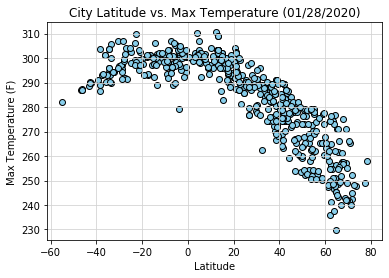

In [16]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature (01/28/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.show()


#### Latitude vs. Humidity Plot

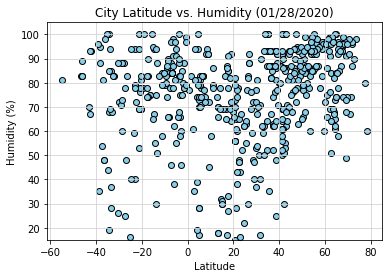

In [17]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (01/28/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

plt.show()

#### Latitude vs. Cloudiness Plot

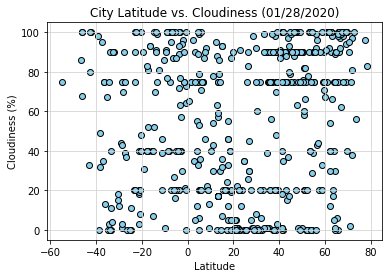

In [18]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (01/28/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.show()

#### Latitude vs. Wind Speed Plot

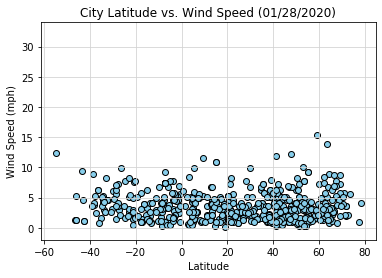

In [19]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed (01/28/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


In [ ]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression